In [3]:
import pandas as pd
import re
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### Load the dataset & read the dataset

In [4]:
df=pd.read_csv(r"C:\Users\lunav\OneDrive\Desktop\training.1600000.processed.noemoticon.csv",encoding='ISO-8859-1', header=None)
df

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


# Print the first few rows of the dataset

In [5]:

print(df.head())

   0           1                             2         3                4  \
0  0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY  _TheSpecialOne_   
1  0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY    scotthamilton   
2  0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY         mattycus   
3  0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          ElleCTF   
4  0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY           Karoli   

                                                   5  
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1  is upset that he can't update his Facebook by ...  
2  @Kenichan I dived many times for the ball. Man...  
3    my whole body feels itchy and like its on fire   
4  @nationwideclass no, it's not behaving at all....  


# Check for missing values

In [6]:

print(df.isnull().sum())

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64


 # Exploratory Data Analysis (EDA)
# Basic statistics

In [7]:

print(df.describe())


                  0             1
count  1.600000e+06  1.600000e+06
mean   2.000000e+00  1.998818e+09
std    2.000001e+00  1.935761e+08
min    0.000000e+00  1.467810e+09
25%    0.000000e+00  1.956916e+09
50%    2.000000e+00  2.002102e+09
75%    4.000000e+00  2.177059e+09
max    4.000000e+00  2.329206e+09


### Assign column names

In [8]:

df.columns = ['sentiment', 'id', 'date', 'query', 'user', 'text']

# Keep only necessary columns

In [11]:

df = df[['sentiment', 'text']]

# Map sentiments to 0 and 1 using .loc

In [12]:

df.loc[:, 'sentiment'] = df['sentiment'].map({0: 0, 4: 1})

# Data cleaning function

In [13]:

def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)     # Remove mentions
    text = re.sub(r'#\w+', '', text)     # Remove hashtags
    text = re.sub(r'\W', ' ', text)      # Remove special characters
    text = text.lower()                  # Convert to lowercase
    return text


# Clean the tweets

In [14]:

df.loc[:, 'text'] = df['text'].apply(clean_text)

# Split data into training and validation sets

In [15]:

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)

# Tokenize the tweets

In [16]:

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)

# Pad sequences

In [17]:

maxlen = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen)
X_val_pad = pad_sequences(X_val_seq, maxlen=maxlen)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Build the model

In [19]:

model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128))  # Remove input_length argument
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model

In [20]:

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary

In [21]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# Train the model

In [15]:

history = model.fit(X_train_pad, y_train, epochs=2, batch_size=64, validation_data=(X_val_pad, y_val))


Epoch 1/2
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 3903s 193ms/step - accuracy: 0.7924 - loss: 0.4419 - val_accuracy: 0.8224 - val_loss: 0.3902
Epoch 2/2
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 3612s 181ms/step - accuracy: 0.8287 - loss: 0.3793 - val_accuracy: 0.8288 - val_loss: 0.3795


# Evaluate the model on the validation set

In [22]:

loss, accuracy = model.evaluate(X_val_pad, y_val)
print(f'Validation Accuracy: {accuracy}')

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 191s 19ms/step - accuracy: 0.5007 - loss: 0.6931
Validation Accuracy: 0.5011906027793884


# Plot training & validation accuracy values

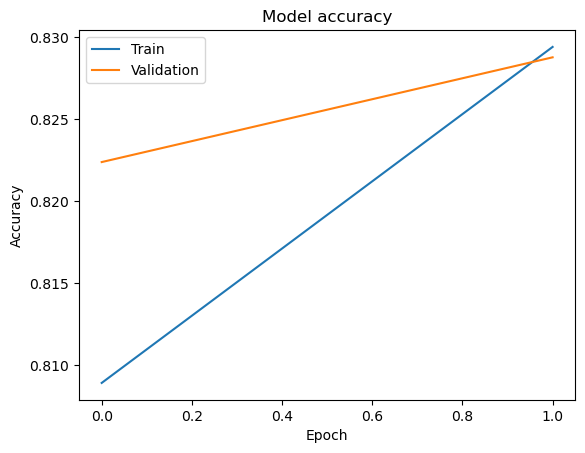

In [19]:

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Plot training & validation loss values

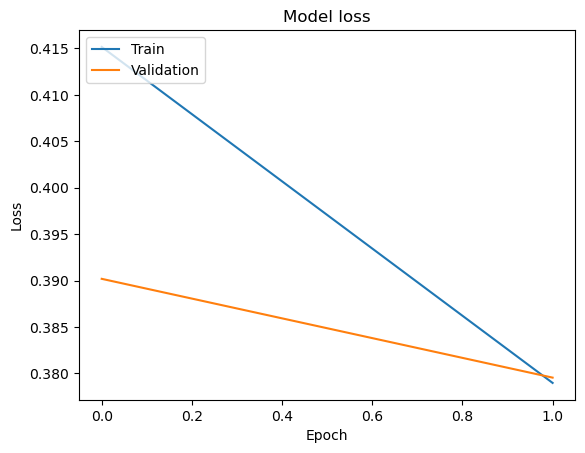

In [17]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()